<a href="https://colab.research.google.com/github/ShoebAgha/Pytorch/blob/main/Pytorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data (Preparing and Loading)**

In [2]:
from torch import nn
import torch
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [3]:
w=0.7
b=1

start=0
end=20
step=0.4

X=torch.arange(start,end,step).float()

y=w*X+b+torch.rand_like(X)
y.unsqueeze_(dim=1)
X[:10],y[:10]

(tensor([0.0000, 0.4000, 0.8000, 1.2000, 1.6000, 2.0000, 2.4000, 2.8000, 3.2000,
         3.6000]),
 tensor([[1.3518],
         [1.5132],
         [2.0036],
         [1.8872],
         [2.1910],
         [2.7682],
         [2.8918],
         [3.8412],
         [3.7614],
         [4.0797]]))

In [4]:
train_split=int(0.8*len(X))
X_train,y_train =X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data,train_labels, test_data, test_labels,predictions=None):
 plt.figure(figsize=(10,7))

 plt.scatter(train_data, train_labels, c='b', label="Training Data")
 plt.scatter(test_data, test_labels, c='g', label="Testing Data")

 if predictions is not None:
  plt.scatter(test_data, predictions, c='r', label="Predictions")

 plt.legend()









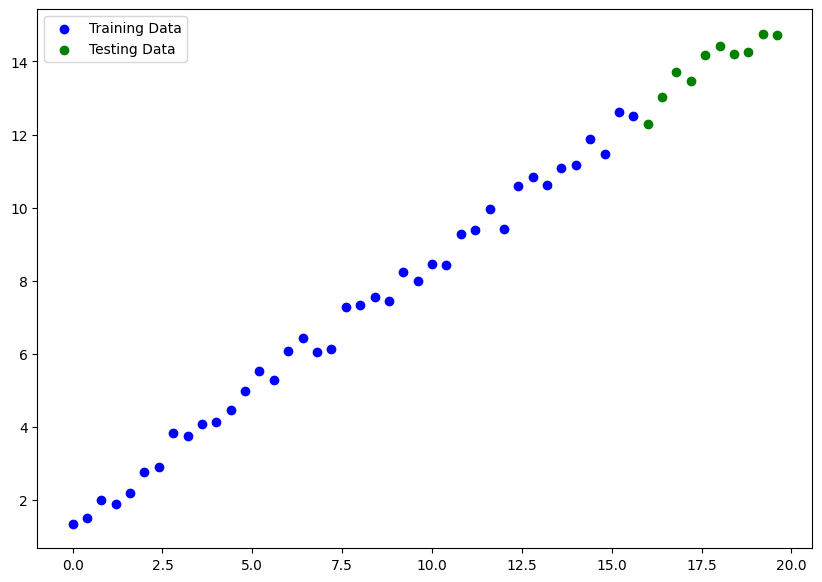

In [6]:
plot_predictions(X_train,y_train, X_test, y_test)

**Building Model**

In [7]:
from numpy import require
class LinearRegressionModel(nn.Module):
  def __init__(self):
   super().__init__()
   self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
   self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

  def forward(self, x:torch.Tensor):
    return (self.weights*x + self.bias).unsqueeze(dim=1)

In [8]:
torch.manual_seed(50)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.4625], requires_grad=True),
 Parameter containing:
 tensor([-0.1692], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4625])), ('bias', tensor([-0.1692]))])

In [10]:
with torch.inference_mode():
  y_pred=model_0(X_test)

y_pred

tensor([[7.2306],
        [7.4156],
        [7.6006],
        [7.7856],
        [7.9706],
        [8.1556],
        [8.3406],
        [8.5256],
        [8.7106],
        [8.8956]])

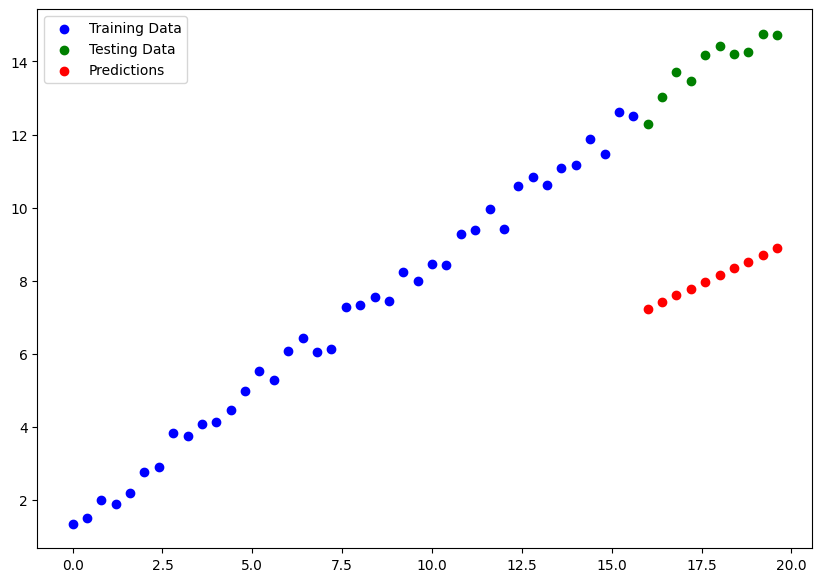

In [11]:
plot_predictions(X_train,y_train, X_test,y_test, y_pred)

**Setting Loss Function and Optimiser**

In [12]:
loss_fn = nn.MSELoss()

optimiser = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Building a training Loop in Pytorch

In [13]:
epochs = 1000

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  model_0.train()

  y_pred=model_0(X_train)

  loss=loss_fn(y_pred,y_train)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    if epoch%10==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")






Epoch: 0 | MAE Train Loss: 13.956985473632812 | MAE Test Loss: 36.08042526245117 
Epoch: 10 | MAE Train Loss: 0.6238411068916321 | MAE Test Loss: 1.8611164093017578 
Epoch: 20 | MAE Train Loss: 0.5676131248474121 | MAE Test Loss: 1.5558884143829346 
Epoch: 30 | MAE Train Loss: 0.5196710824966431 | MAE Test Loss: 1.43930983543396 
Epoch: 40 | MAE Train Loss: 0.4764276444911957 | MAE Test Loss: 1.335302710533142 
Epoch: 50 | MAE Train Loss: 0.4374217092990875 | MAE Test Loss: 1.2404563426971436 
Epoch: 60 | MAE Train Loss: 0.40223807096481323 | MAE Test Loss: 1.153898000717163 
Epoch: 70 | MAE Train Loss: 0.37050217390060425 | MAE Test Loss: 1.0748612880706787 
Epoch: 80 | MAE Train Loss: 0.3418763279914856 | MAE Test Loss: 1.0026520490646362 
Epoch: 90 | MAE Train Loss: 0.3160555362701416 | MAE Test Loss: 0.9366575479507446 
Epoch: 100 | MAE Train Loss: 0.29276496171951294 | MAE Test Loss: 0.8763060569763184 
Epoch: 110 | MAE Train Loss: 0.2717565894126892 | MAE Test Loss: 0.82109200954

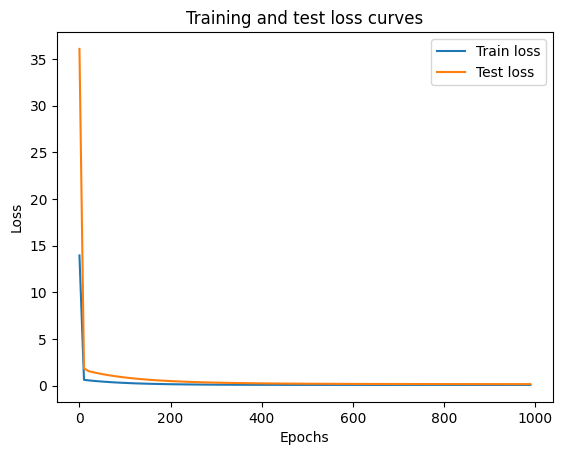

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7167], requires_grad=True),
 Parameter containing:
 tensor([1.3822], requires_grad=True)]

In [16]:
model_0.eval()

with torch.inference_mode():

  y_preds = model_0(X_test)
y_preds

tensor([[12.8502],
        [13.1369],
        [13.4236],
        [13.7103],
        [13.9970],
        [14.2837],
        [14.5704],
        [14.8571],
        [15.1438],
        [15.4305]])

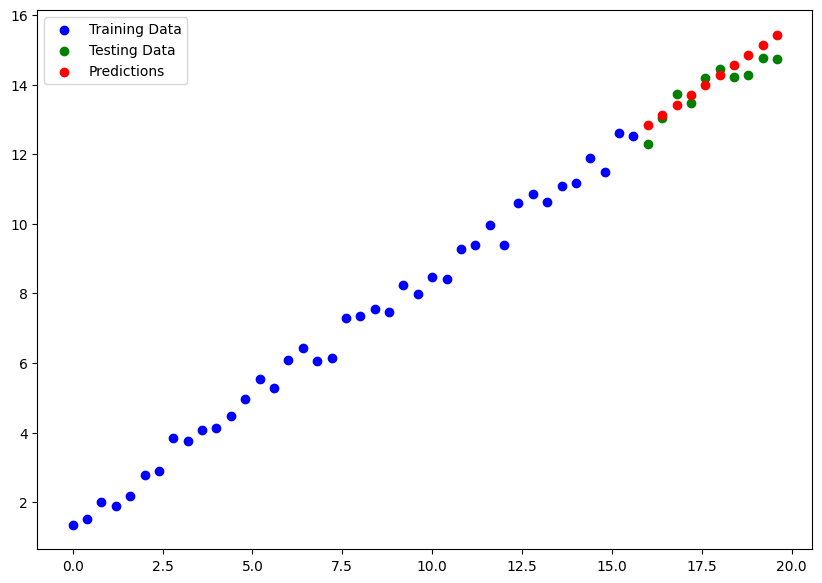

In [17]:
plot_predictions(X_train,y_train, X_test,y_test, y_preds)

***Saving the model***

In [18]:
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f'Saving Model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to model/01_pytorch_workflow_model_0.pth


***Loading the Model***

In [19]:
from pickle import load
loaded_model_0=LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [20]:
loaded_model_0.eval()

with torch.inference_mode():
  y_pred_loaded=loaded_model_0(X_test)
y_pred_loaded==y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])